In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [4]:
# Load and prepare the dataset
columns = ["duration","protocoltype","service","flag","srcbytes","dstbytes","land",
           "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised",
           "rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles",
           "numoutboundcmds","ishostlogin", "isguestlogin","count","srvcount","serrorrate",
           "srvserrorrate","rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate","srvdiffhostrate",
           "dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate",
           "dsthostsamesrcportrate","dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
           "dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"]

# Loading data
data = pd.read_csv("train.txt", sep=",", names=columns)
data_test = pd.read_csv("test.txt", sep=",", names=columns)

# Data Preprocessing
# Removing irrelevant features
data.drop(['land', 'urgent', 'numfailedlogins', 'numoutboundcmds'], axis=1, inplace=True)

# Handling missing values
data = data.dropna(axis=0)

# Encoding categorical variables
label_encoder = LabelEncoder()
data['protocoltype'] = label_encoder.fit_transform(data['protocoltype'])
data['service'] = label_encoder.fit_transform(data['service'])
data['flag'] = label_encoder.fit_transform(data['flag'])

# Convert 'attack' feature to binary classification
data['attack'] = np.where(data['attack'] != "normal", "attack", "normal")
data['attack'] = label_encoder.fit_transform(data['attack'])

<ipython-input-4-0b2595a1bd79>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['protocoltype'] = label_encoder.fit_transform(data['protocoltype'])
<ipython-input-4-0b2595a1bd79>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['service'] = label_encoder.fit_transform(data['service'])
<ipython-input-4-0b2595a1bd79>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

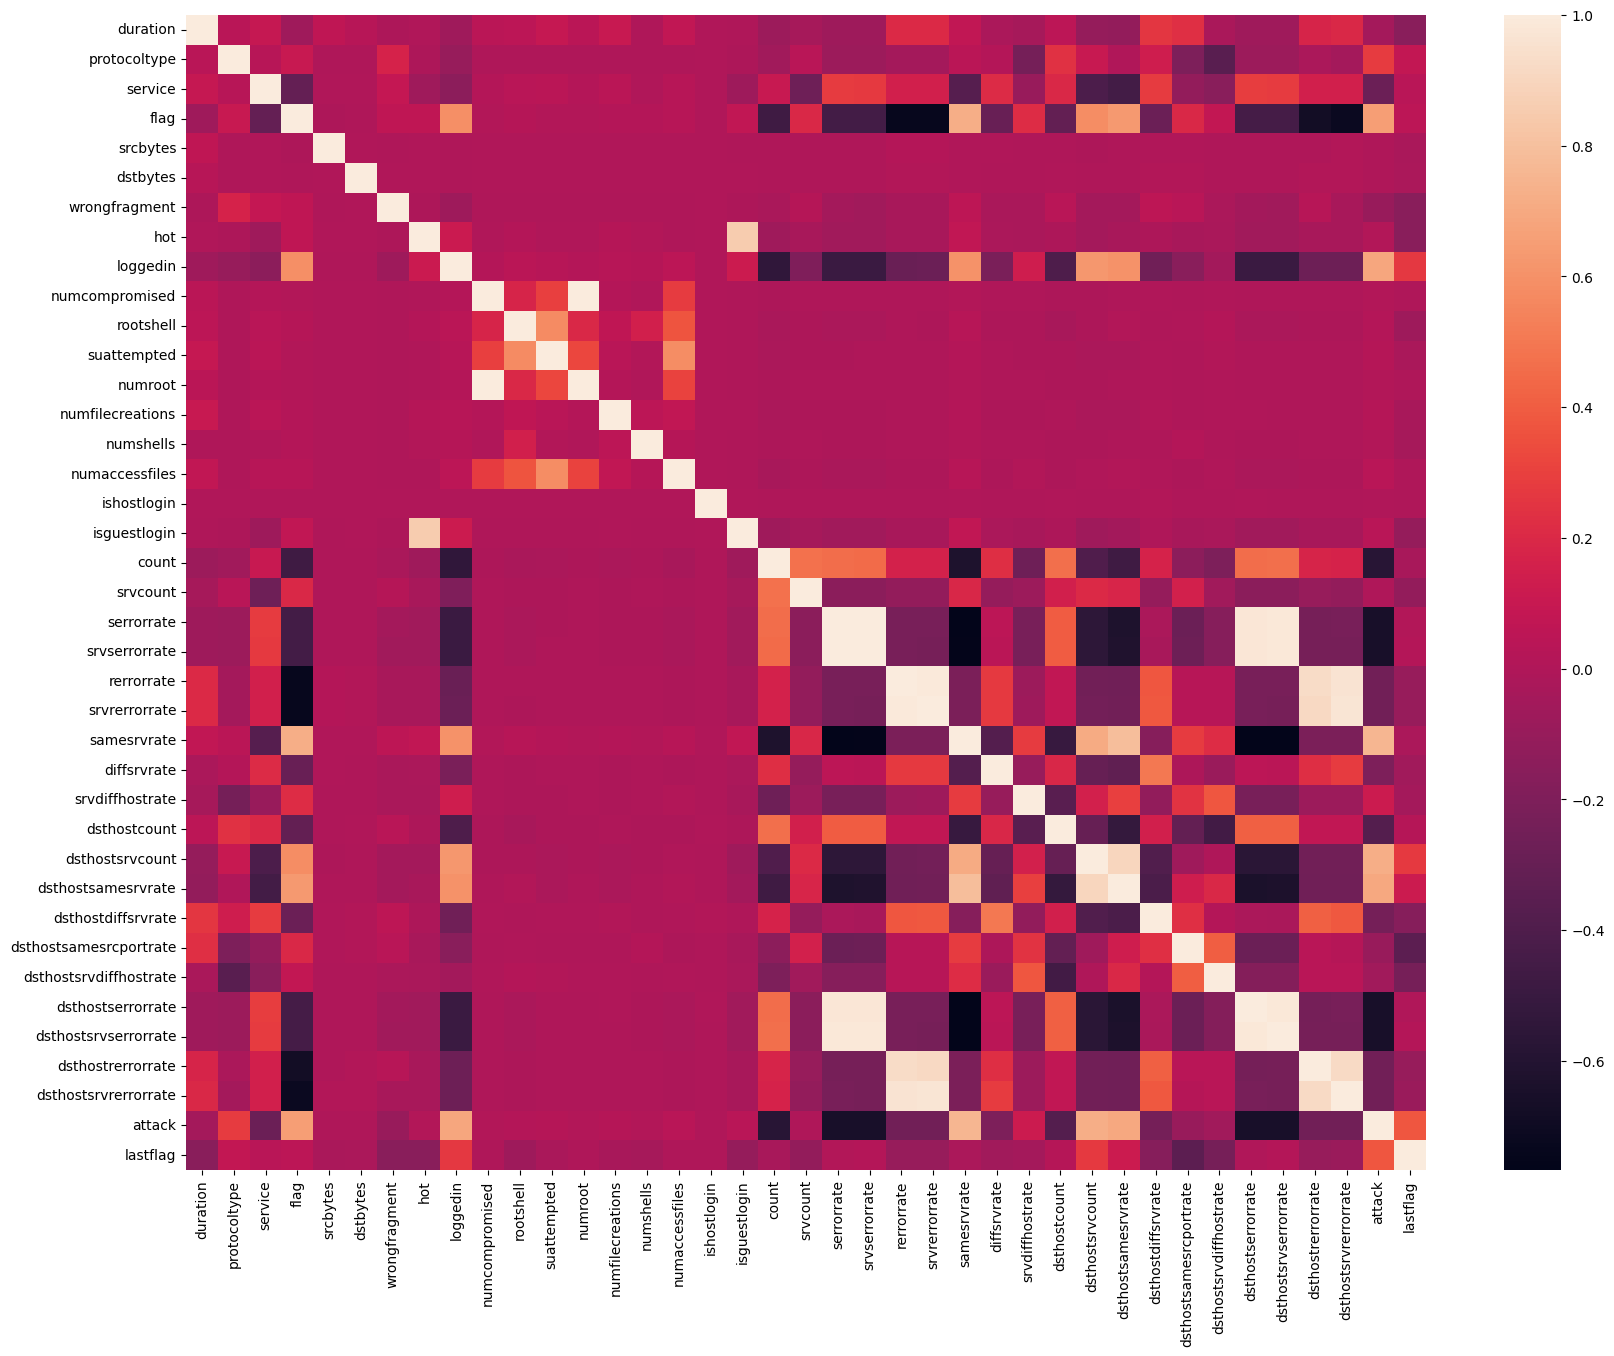

In [5]:
# Data Visualization
# Correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr())
plt.show()

In [6]:
# Feature Scaling
scaler = MinMaxScaler()
X = data.drop("attack", axis=1)
X = scaler.fit_transform(X)
y = data['attack']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
predictions = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.974240475807748
ROC-AUC Score: 0.9743542127713856
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     11619
           1       0.98      0.97      0.98     13265

    accuracy                           0.97     24884
   macro avg       0.97      0.97      0.97     24884
weighted avg       0.97      0.97      0.97     24884

Confusion Matrix:
 [[11341   278]
 [  363 12902]]


In [8]:

# Hyperparameter Tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best Parameters and Improved Predictions
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
improved_predictions = grid_search.predict(X_test)

# Evaluation of Improved Model
print("Improved Accuracy:", accuracy_score(y_test, improved_predictions))
print("Improved ROC-AUC Score:", roc_auc_score(y_test, improved_predictions))
print("Improved Classification Report:\n", classification_report(y_test, improved_predictions))
print("Improved Confusion Matrix:\n", confusion_matrix(y_test, improved_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 100, 'penalty': 'l2'}
Improved Accuracy: 0.9764507313936666
Improved ROC-AUC Score: 0.9766035504643974
Improved Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     11619
           1       0.98      0.97      0.98     13265

    accuracy                           0.98     24884
   macro avg       0.98      0.98      0.98     24884
weighted avg       0.98      0.98      0.98     24884

Improved Confusion Matrix:
 [[11374   245]
 [  341 12924]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
